# https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial code taken from this site

In [4]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import time
import datetime
import matplotlib.pyplot as plt

In [2]:
test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_15_april_10000_1.csv')

In [5]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [7]:
my_data=test_new.loc[200:250,['dateTime','AEDATZ_HO_V0','RWWIHOA_HWT0','AEDAHO_T9_V2']]

In [8]:
my_data_1 = my_data.set_index('dateTime')
my_data_1.head()

,AEDATZ_HO_V0,RWWIHOA_HWT0,AEDAHO_T9_V2
dateTime,,,
2019-04-11 16:54:00,33.323896,89.517397,42.040317
2019-04-11 16:53:00,35.012233,89.582214,42.105153
2019-04-11 16:52:00,36.936605,89.563579,42.097709
2019-04-11 16:51:00,37.425148,89.500385,42.127110
2019-04-11 16:50:00,36.843848,89.559533,42.001027


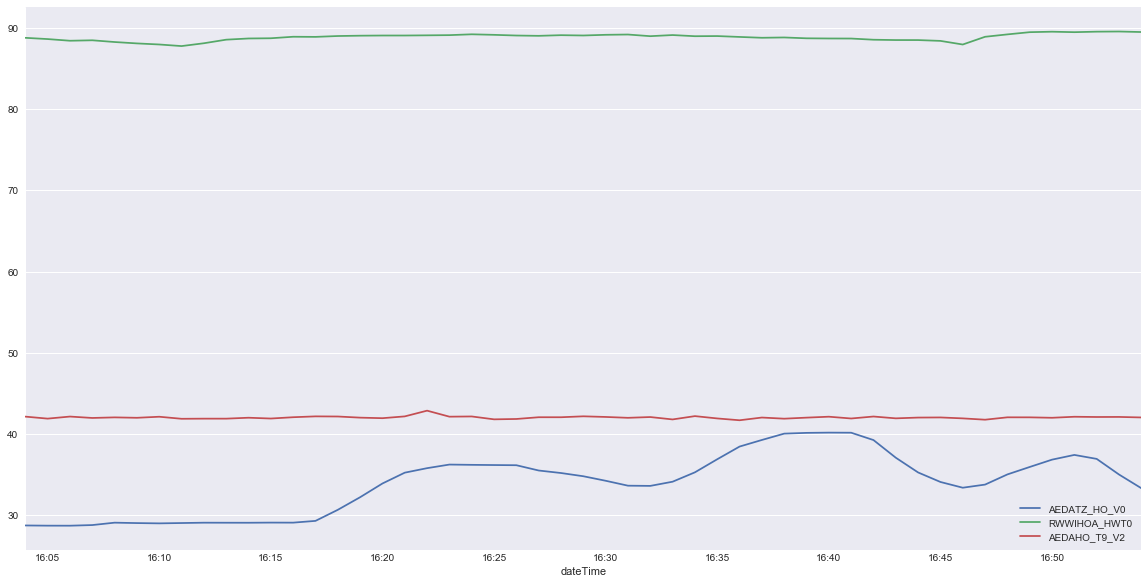

In [9]:
my_data_1.plot(figsize=(20,10),xlim=(my_data_1.index[-1],my_data_1.index[0])) # look at here, plot. don't use plt. 
# my_data_1.to_csv("E:/University of Bremen MSc/masters_thesis/IAT_sebastian/code/code_file/Arima.csv")

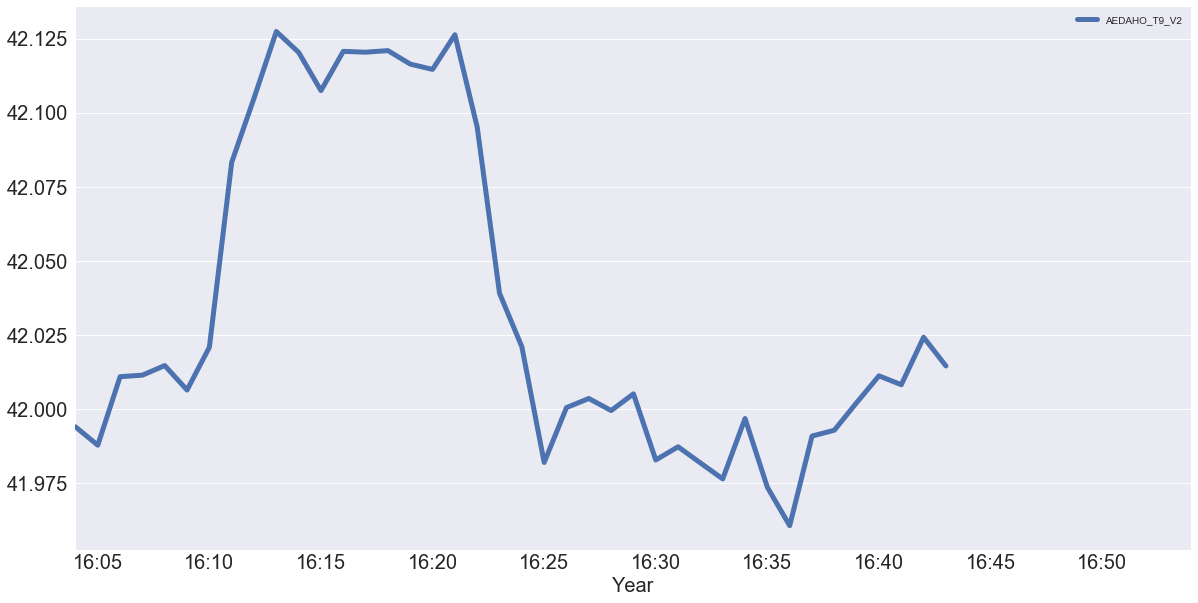

In [10]:
AEDAHO_T9_V2 = my_data_1[['AEDAHO_T9_V2']]
AEDAHO_T9_V2.rolling(12).mean().plot(figsize=(20,10),xlim=(my_data_1.index[-1],my_data_1.index[0]), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

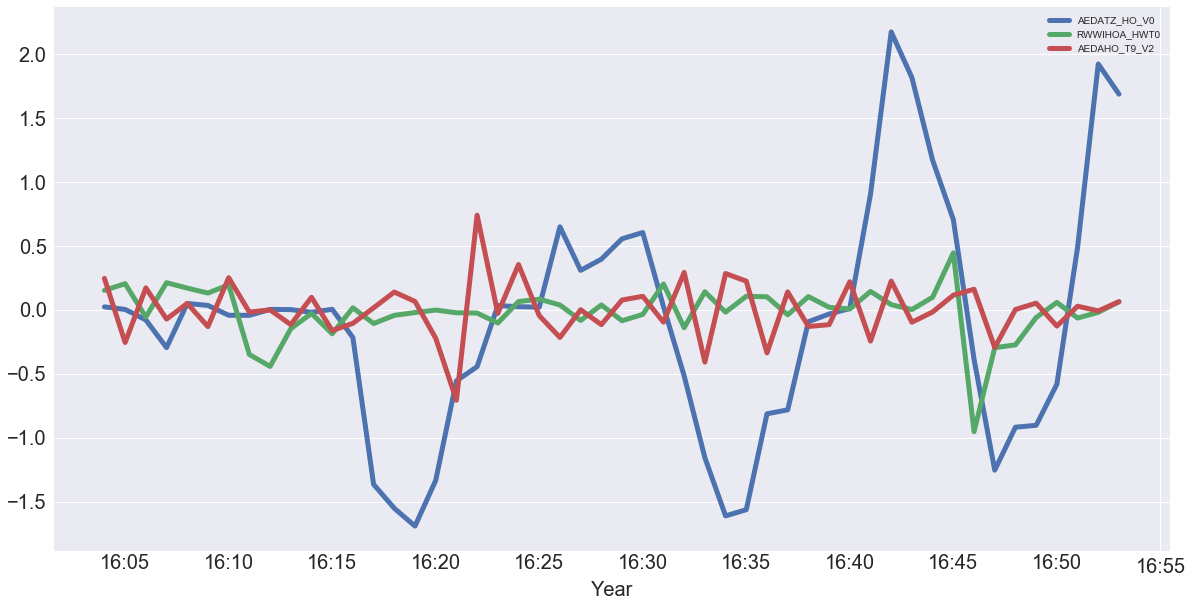

In [11]:
# print(type(AEDAHO_T8_V2))
# AEDAHO_T8_V2.head()
my_data_1.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

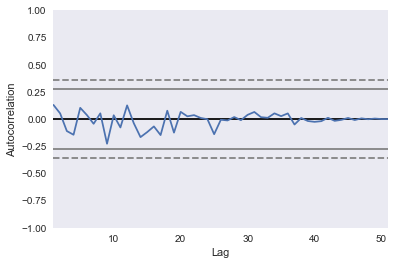

In [12]:
pd.plotting.autocorrelation_plot(AEDAHO_T9_V2)